In [1]:
from gammapy.modeling.models import Models
import astropy.units as u
from gammapy.maps import MapAxis, RegionNDMap
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
rc("text", usetex=True)

In [2]:
models = Models.read('../E_reco_PKSflare_crab_cutoff/data/0_model_livetime_2.154434690031884.yml')

<Axes: xlabel='Energy [$\\mathrm{TeV}$]', ylabel='dnde [$\\mathrm{TeV^{-1}\\,s^{-1}\\,cm^{-2}}$]'>

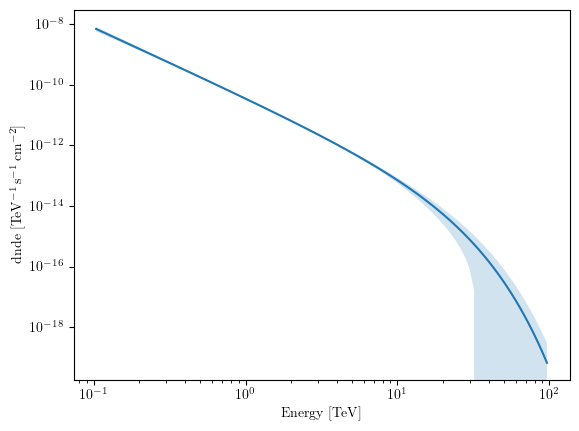

In [3]:
eb = (0.1, 100) *u.TeV
models[0].spectral_model.plot(eb)
models[0].spectral_model.plot_error(eb, facecolor = 'tab:blue')

In [4]:
model_no_corr = models[0].spectral_model.copy()
for p in model_no_corr.parameters.free_parameters:
    model_no_corr.parameters[p].error = 0. # 0.1 * model_no_corr.parameters[p].value

delta_err = 0.5
model_ampliude = model_no_corr.copy() 
p = "amplitude"
model_ampliude.parameters[p].error =  delta_err * model_ampliude.parameters[p].value

model_index = model_no_corr.copy() 
p = "index"
model_index.parameters[p].error =  delta_err * model_index.parameters[p].value

model_lambda_ = model_no_corr.copy() 
p = "lambda_"
model_lambda_.parameters[p].error =  delta_err * model_lambda_.parameters[p].value



delta_err2 = 0.1
model_ampliude2 = model_no_corr.copy() 
p = "amplitude"
model_ampliude2.parameters[p].error =  delta_err2 * model_ampliude.parameters[p].value

model_index2 = model_no_corr.copy() 
p = "index"
model_index2.parameters[p].error =  delta_err2 * model_index.parameters[p].value

model_lambda_2 = model_no_corr.copy() 
p = "lambda_"
model_lambda_2.parameters[p].error =  delta_err2 * model_lambda_.parameters[p].value


In [5]:
stat_pers = []
for p in ['amplitude', 'index','lambda_']:
    stat_per = models.parameters[p].error/models.parameters[p].value
    print(p, f'{stat_per*100:.3}')
    stat_pers.append(stat_per)

amplitude 6.77
index 4.04
lambda_ 40.0


T =  7.61e-09, deltaT = 3.8e-09
[5.78409702e-17] 1 / (cm4 s2 TeV2)
3.7056249999999996e-20
[1.46402509e-18] 1 / (cm2 s TeV)


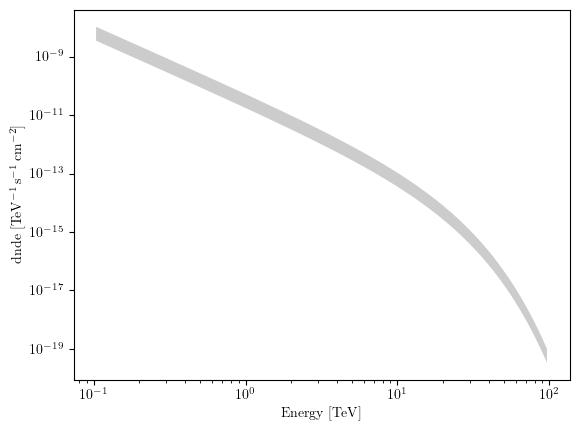

In [6]:

model_ampliude.plot_error(eb)

energy_min, energy_max = eb
energy = MapAxis.from_energy_bounds(
        energy_min,
        energy_max,
        1,
    node_type="center",
    )
x,xerr = model_ampliude._get_plot_flux(energy, "dnde")
print(f"T =  {x.data.flatten()[0]:.3}, deltaT = {xerr.data.flatten()[0]:.3}" )

T2 = model_ampliude(energy.center) **2 
deltaxperx2 = np.sqrt(np.diag(model_ampliude.covariance)[1])**2 / model_ampliude.parameters[p].value **2
print(T2)
print(deltaxperx2)

deltat = np.sqrt(T2 * deltaxperx2)
print(deltat)

In [7]:
amplitude_err = []
index_err = []
lambda__err = []

amplitude_err2 = []
index_err2 = []
lambda__err2 = []

combined = []

T = []
energys = np.logspace(-1,2, 100) *u.TeV
for e_min in energys: 
    energy = MapAxis.from_energy_bounds(
            e_min,
            energy_max,
            1,
        node_type="center",
        )
    x,xerr = model_ampliude._get_plot_flux(energy, "dnde")
    amplitude_err.append(xerr.data[0][0])
    
    x,xerr = model_index._get_plot_flux(energy, "dnde")
    index_err.append(xerr.data[0][0])
    
    x,xerr = model_lambda_._get_plot_flux(energy, "dnde")
    lambda__err.append(xerr.data[0][0])
    
    
    x,xerr = model_ampliude2._get_plot_flux(energy, "dnde")
    amplitude_err2.append(xerr.data[0][0])
    
    x,xerr = model_index2._get_plot_flux(energy, "dnde")
    index_err2.append(xerr.data[0][0])
    
    x,xerr = model_lambda_2._get_plot_flux(energy, "dnde")
    lambda__err2.append(xerr.data[0][0])
    

    
    
    T.append(x.data[0][0])

[]

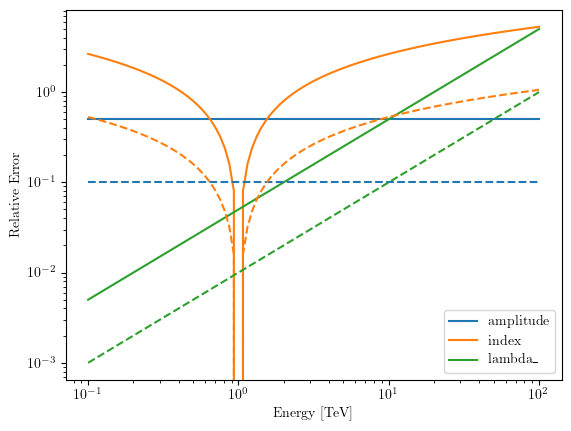

In [8]:
colors = ['tab:blue', 'tab:orange', 'tab:green']
plt.plot(energys,np.array(amplitude_err)/np.array(T), label = "amplitude", color = colors[0])
plt.plot(energys,np.array(index_err)/np.array(T), label = "index", color = colors[1])
plt.plot(energys,np.array(lambda__err)/np.array(T), label = "lambda_", color = colors[2])

ls = 'dashed'
plt.plot(energys,np.array(amplitude_err2)/np.array(T), linestyle = ls, label = "", color = colors[0])
plt.plot(energys,np.array(index_err2)/np.array(T), linestyle = ls, label = "", color = colors[1])
plt.plot(energys,np.array(lambda__err2)/np.array(T), linestyle = ls, label = "", color = colors[2])

plt.legend()
plt.xlabel("Energy [TeV]")
plt.ylabel("Relative Error")

plt.loglog()

## With correlations 

<Axes: >

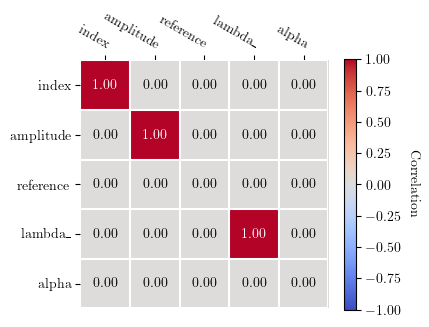

In [9]:
model_ampliude3 = model_no_corr.copy() 
p = "amplitude"
model_ampliude3.parameters[p].error =  stat_pers[0] * model_ampliude.parameters[p].value

model_index3 = model_no_corr.copy() 
p = "index"
model_index3.parameters[p].error =  stat_pers[1] * model_index.parameters[p].value

model_lambda_3 = model_no_corr.copy() 
p = "lambda_"
model_lambda_3.parameters[p].error =  stat_pers[2] * model_lambda_.parameters[p].value


model_3 = model_no_corr.copy() 
for i, p in enumerate(['amplitude', 'index','lambda_']):
    model_3.parameters[p].error =  stat_pers[i] *  model_no_corr.parameters[p].value
    

model_3.covariance.data[0,1] = 0
model_3.covariance.data[0,3] = 0
model_3.covariance.data[1,3] = 0
model_3.covariance.data[1,0] = 0
model_3.covariance.data[3,0] = 0
model_3.covariance.data[3,1] = 0
model_3.covariance.plot_correlation()


In [10]:
amplitude_err = []
index_err = []
lambda__err = []

combined = []
combined_no_corr = []

T = []
energys = np.logspace(-1,2, 100) *u.TeV
for e_min in energys: 
    energy = MapAxis.from_energy_bounds(
            e_min,
            energy_max,
            1,
        node_type="center",
        )
    x,xerr = model_ampliude3._get_plot_flux(energy, "dnde")
    amplitude_err.append(xerr.data[0][0])
    
    x,xerr = model_index3._get_plot_flux(energy, "dnde")
    index_err.append(xerr.data[0][0])
    
    x,xerr = model_lambda_3._get_plot_flux(energy, "dnde")
    lambda__err.append(xerr.data[0][0])
    
    x,xerr = models[0].spectral_model._get_plot_flux(energy, "dnde")
    combined.append(xerr.data[0][0])
    
    x,xerr = model_3._get_plot_flux(energy, "dnde")
    combined_no_corr.append(xerr.data[0][0])
    
    T.append(x.data[0][0])

[]

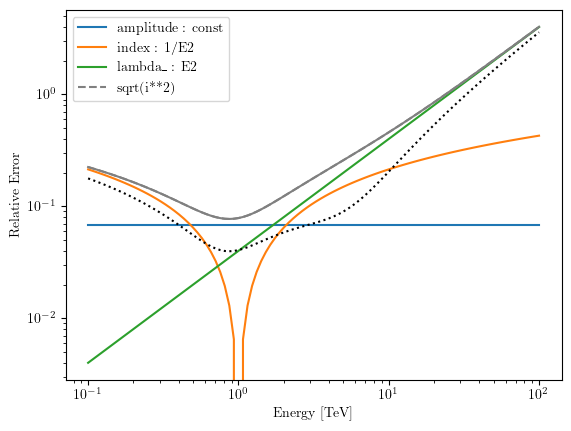

In [11]:
colors = ['tab:blue', 'tab:orange', 'tab:green']
all_ = np.sqrt(np.array(amplitude_err) **2 + np.array(index_err)**2 + np.array(lambda__err) **2)
plt.plot(energys,np.array(amplitude_err)/np.array(T), label = "amplitude : const", color = colors[0])
plt.plot(energys,np.array(index_err)/np.array(T), label = "index : 1/E2", color = colors[1])
plt.plot(energys,np.array(lambda__err)/np.array(T), label = "lambda_ : E2", color = colors[2])


plt.plot(energys,np.array(combined_no_corr)/np.array(T), linestyle = '-', label = "", color = 'grey')
plt.plot(energys,np.array(all_)/np.array(T),linestyle = ls,  label = "sqrt(i**2)", color = 'grey')

plt.plot(energys,np.array(combined)/np.array(T), linestyle = ':', label = "", color = 'black')

plt.legend()
plt.xlabel("Energy [TeV]")
plt.ylabel("Relative Error")

plt.loglog()

## step-by-step

[[ 8.65081162e-03 -1.65876866e-13  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-1.65876866e-13  6.78865729e-24  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.60214501e-03
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]


<Axes: >

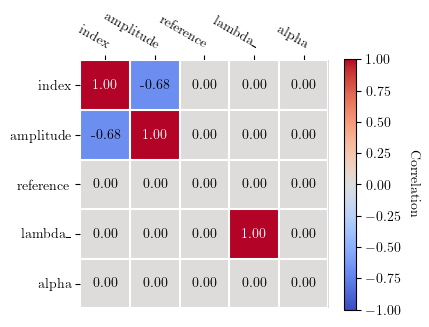

In [12]:
model_ampliudeindex = models[0].spectral_model.copy() 
model_ampliudeindex.covariance.data[0,3]  = 0.
model_ampliudeindex.covariance.data[1,3]  = 0.
model_ampliudeindex.covariance.data[3,1]  = 0.
model_ampliudeindex.covariance.data[3,0]  = 0.



print(model_ampliudeindex.covariance)
model_ampliudeindex.covariance.plot_correlation()

[[ 8.65081162e-03  0.00000000e+00  0.00000000e+00 -3.11713238e-03
   0.00000000e+00]
 [ 0.00000000e+00  6.78865729e-24  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-3.11713238e-03  0.00000000e+00  0.00000000e+00  1.60214501e-03
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]


<Axes: >

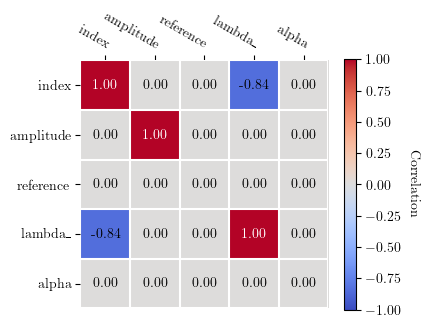

In [13]:
model_indexlambda_ = models[0].spectral_model.copy() 
model_indexlambda_.covariance.data[0,1]  = 0.
model_indexlambda_.covariance.data[1,3]  = 0.
model_indexlambda_.covariance.data[3,1]  = 0.
model_indexlambda_.covariance.data[1,0]  = 0.

print(model_indexlambda_.covariance)
model_indexlambda_.covariance.plot_correlation()

[[8.65081162e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 6.78865729e-24 0.00000000e+00 8.71517827e-14
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 8.71517827e-14 0.00000000e+00 1.60214501e-03
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


<Axes: >

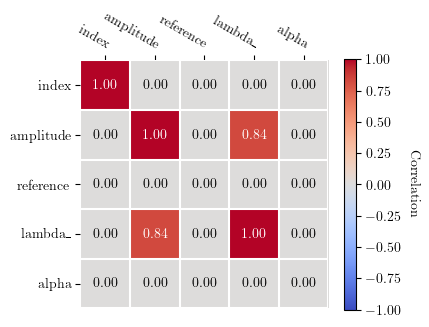

In [14]:
model_lambda_amplitude = models[0].spectral_model.copy() 
model_lambda_amplitude.covariance.data[0,1]  = 0.
model_lambda_amplitude.covariance.data[0,3]  = 0.
model_lambda_amplitude.covariance.data[3,0]  = 0.
model_lambda_amplitude.covariance.data[1,0]  = 0.

print(model_lambda_amplitude.covariance)
model_lambda_amplitude.covariance.plot_correlation()

In [15]:
amplitudeindex_err = []
indexlamba_err = []
lambda_amplitude_err = []


T = []
energys = np.logspace(-1,2, 100) *u.TeV
for e_min in energys: 
    energy = MapAxis.from_energy_bounds(
            e_min,
            energy_max,
            1,
        node_type="center",
        )
    x,xerr = model_ampliudeindex._get_plot_flux(energy, "dnde")
    amplitudeindex_err.append(xerr.data[0][0])
    
    x,xerr = model_indexlambda_._get_plot_flux(energy, "dnde")
    indexlamba_err.append(xerr.data[0][0])
    
    x,xerr = model_lambda_amplitude._get_plot_flux(energy, "dnde")
    lambda_amplitude_err.append(xerr.data[0][0])
    
    
    T.append(x.data[0][0])

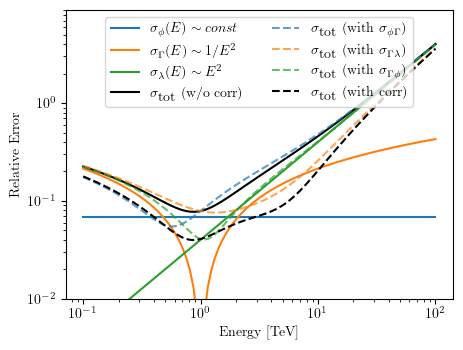

In [73]:
fig,axs = plt.subplots(1,1, figsize = (5, 3 * 5/4))
colors = ['tab:blue', 'tab:orange', 'tab:green']
all_ = np.sqrt(np.array(amplitude_err) **2 + np.array(index_err)**2 + np.array(lambda__err) **2)
plt.plot(energys,np.array(amplitude_err)/np.array(T), label = "$\\sigma_{\phi} (E) \\sim const$ ", color = colors[0])
plt.plot(energys,np.array(index_err)/np.array(T), label = "$\\sigma_{\Gamma} (E) \\sim 1/E^2$", color = colors[1])
plt.plot(energys,np.array(lambda__err)/np.array(T), label = "$\\sigma_{\lambda} (E) \\sim E^2$", color = colors[2])


ls2= 'dashed'
alpha= 0.7
plt.plot(energys,np.array(combined_no_corr)/np.array(T), linestyle = '-', label = "$\sigma_{\\textrm{tot}}$ (w/o corr)", color = 'blacK')
plt.plot(energys,np.array(amplitudeindex_err)/np.array(T), linestyle = ls2,  color = colors[0],
         label = "$\sigma_{\\textrm{tot}}$ (with $\sigma_{ \phi \Gamma} $)",
        alpha = alpha)
plt.plot(energys,np.array(indexlamba_err)/np.array(T), linestyle = ls2,   
         label = "$\sigma_{\\textrm{tot}}$ (with $\sigma_{ \Gamma \lambda} $)",
        alpha = alpha, color = colors[1])
plt.plot(energys,np.array(lambda_amplitude_err)/np.array(T), linestyle = ls2,
         label = "$\sigma_{\\textrm{tot}}$ (with $\sigma_{ \Gamma \phi} $)",
        alpha = alpha,  color = colors[2])



plt.plot(energys,np.array(combined)/np.array(T), linestyle = '--', label ="$\sigma_{\\textrm{tot}}$ (with corr)", color = 'black')

plt.legend(ncol = 2, loc = 'upper center')
plt.xlabel("Energy [TeV]")
plt.ylabel("Relative Error")
plt.ylim(1e-2, 9)
plt.loglog()

fig.savefig('plots/error_prop.pdf', bbox_inches = 'tight')

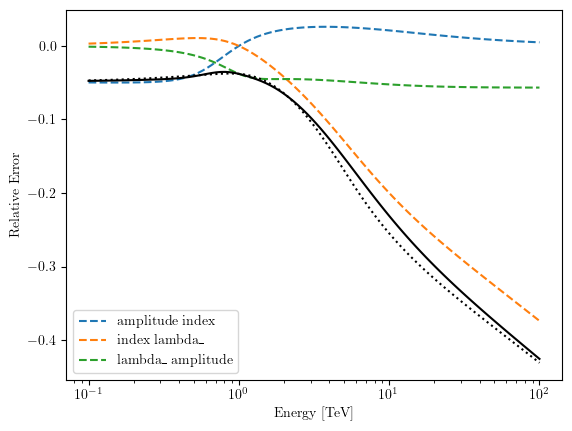

In [17]:
colors = ['tab:blue', 'tab:orange', 'tab:green']
all_ = combined_no_corr# np.array(amplitude_err)**2  + np.array(index_err)**2 + np.array(lambda__err) **2


ls2= 'dashed'
plt.plot(energys,(np.array(amplitudeindex_err) - all_ )/np.array(T), 
         linestyle = ls2, label = "amplitude index", color = colors[0])
plt.plot(energys,(np.array(indexlamba_err) - all_ )/np.array(T), linestyle = ls2, label = "index lambda_", color = colors[1])
plt.plot(energys,(np.array(lambda_amplitude_err) - all_ )/np.array(T), linestyle = ls2, label = "lambda_ amplitude", color = colors[2])

plt.plot(energys,(np.array(combined)- np.array(combined_no_corr))/np.array(T), linestyle = ':', label = "", color = 'black')


all_temp = (np.array(amplitudeindex_err) - all_ ) + (np.array(indexlamba_err) - all_ ) + (np.array(lambda_amplitude_err) - all_ )
#all_temp = np.sqrt(all_temp)

plt.plot(energys,(np.array(all_temp))/np.array(T), linestyle = '-', label = "", color = 'black')

plt.legend()
plt.xlabel("Energy [TeV]")
plt.ylabel("Relative Error")

plt.loglog()
plt.yscale("linear")

## Dataset NUI

<Axes: >

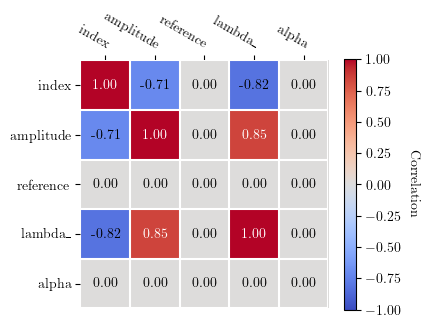

In [18]:
models_N = Models.read('../E_reco_PKSflare_crab_cutoff/data/0_model_nui_livetime_2.154434690031884_3000.yml')
models_N = models_N[0].spectral_model
models_N.covariance.plot_correlation()

<Axes: >

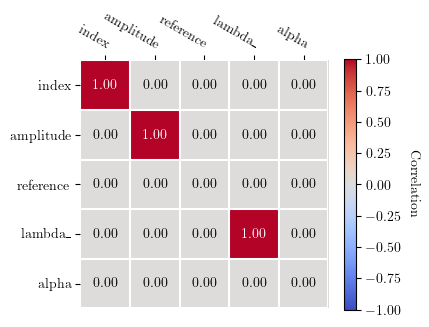

In [19]:
model_N_3 = models_N.copy()
model_N_3.covariance.data[0,1] = 0
model_N_3.covariance.data[0,3] = 0
model_N_3.covariance.data[1,3] = 0
model_N_3.covariance.data[1,0] = 0
model_N_3.covariance.data[3,0] = 0
model_N_3.covariance.data[3,1] = 0
model_N_3.covariance.plot_correlation()

In [20]:
combined_N = []
combined_no_corr_N = []


energys = np.logspace(-1,2, 100) *u.TeV
for e_min in energys: 
    energy = MapAxis.from_energy_bounds(
            e_min,
            energy_max,
            1,
        node_type="center",
        )
    
    x,xerr = models_N._get_plot_flux(energy, "dnde")
    combined_N.append(xerr.data[0][0])
    
    x,xerr = model_N_3._get_plot_flux(energy, "dnde")
    combined_no_corr_N.append(xerr.data[0][0])
    

[]

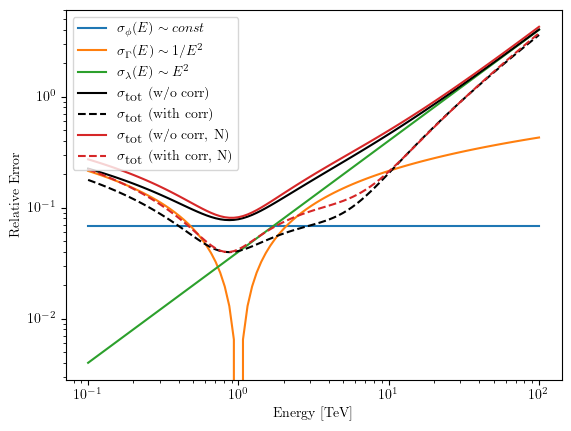

In [21]:
colors = ['tab:blue', 'tab:orange', 'tab:green']
all_ = np.sqrt(np.array(amplitude_err) **2 + np.array(index_err)**2 + np.array(lambda__err) **2)
plt.plot(energys,np.array(amplitude_err)/np.array(T), label = "$\\sigma_{\phi} (E) \\sim const$ ", color = colors[0])
plt.plot(energys,np.array(index_err)/np.array(T), label = "$\\sigma_{\Gamma} (E) \\sim 1/E^2$", color = colors[1])
plt.plot(energys,np.array(lambda__err)/np.array(T), label = "$\\sigma_{\lambda} (E) \\sim E^2$", color = colors[2])


ls2= 'dashed'
alpha= 0.7
plt.plot(energys,np.array(combined_no_corr)/np.array(T), linestyle = '-', label = "$\sigma_{\\textrm{tot}}$ (w/o corr)", color = 'blacK')
plt.plot(energys,np.array(combined)/np.array(T), linestyle = '--', label ="$\sigma_{\\textrm{tot}}$ (with corr)", color = 'black')
plt.plot(energys,np.array(combined_no_corr_N)/np.array(T), linestyle = '-', label ="$\sigma_{\\textrm{tot}}$ (w/o corr, N)", 
         color = 'tab:red')
plt.plot(energys,np.array(combined_N)/np.array(T), linestyle = '--', label ="$\sigma_{\\textrm{tot}}$ (with corr, N)", color = 'tab:red')

plt.legend()
plt.xlabel("Energy [TeV]")
plt.ylabel("Relative Error")

plt.loglog()

## Adding the bias

In [24]:
from gammapy.modeling.models import SpectralModel
from gammapy.modeling import Parameter
class ExpCutoffPowerLawBiasSpectralModel(SpectralModel):

    tag = ["ExpCutoffPowerLawSpectralModel", "ecpl"]

    index = Parameter("index", 1.5)
    amplitude = Parameter(
        name="amplitude",
        value="1e-12 cm-2 s-1 TeV-1",
        scale_method="scale10",
        interp="log",
    )
    amplitude._is_norm = True
    reference = Parameter("reference", "1 TeV", frozen=True)
    lambda_ = Parameter("lambda_", "0.1 TeV-1")
    alpha = Parameter("alpha", "1.0", frozen=True)
    bias = Parameter("bias", "0 TeV", frozen=False)


    @staticmethod
    def evaluate(energy, index, amplitude, reference, lambda_, alpha, bias):
        """Evaluate the model (static function)."""
        pwl = amplitude * ((energy- bias) / reference) ** (-index)
        cutoff = np.exp(-np.power((energy- bias) * lambda_, alpha))

        return pwl * cutoff

In [58]:
models_N_all = Models.read('../E_reco_PKSflare_crab_cutoff/data/0_model_nui_livetime_2.154434690031884_3000.yml')
models_N_all.read_covariance(path = '',
                             filename = '../E_reco_PKSflare_crab_cutoff/data/0_model_nui_livetime_2.154434690031884_3000_covariance.dat',
                             format="ascii.fixed_width")


In [61]:
bias = Parameter("bias", "0 TeV", frozen=False)
bias.error = 0.1 *u.TeV
exp_bias = ExpCutoffPowerLawBiasSpectralModel(amplitude = models_N.parameters['amplitude'],
                                                index = models_N.parameters['index']       ,                                       
                                                lambda_ = models_N.parameters['lambda_']  ,                                           
                                              bias = bias )


<Axes: >

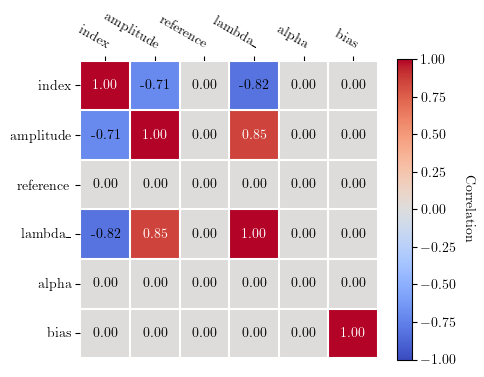

In [62]:
exp_bias.covariance.data[:-1, :-1] = models_N.covariance.data
exp_bias.covariance.plot_correlation()

<Axes: xlabel='Energy [$\\mathrm{TeV}$]', ylabel='dnde [$\\mathrm{TeV^{-1}\\,s^{-1}\\,cm^{-2}}$]'>

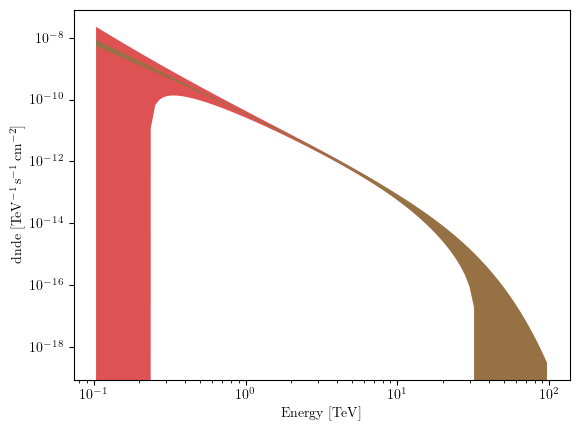

In [63]:
exp_bias.plot_error(eb, facecolor = 'tab:red', alpha =0.8)
models_N.plot_error(eb, facecolor = 'tab:green', alpha = 0.4)
